# Centre Universitaire de Mila

## Master 1 (STIC & I2A), Matière: Apprentissage Automatique

## Travaux pratiques N°2 Apprentissage supervisé et classification

# Linear Classification

In this work, we'll go through an example of linear classification.

- Set up the binary linear classification problem using numpy.
- Use the Iris flower dataset as a running example for classification.
- Explore the geometry of the problem.


In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## The Iris Flower Dataset

The Iris flower dataset is another one of the "toy datasets" available in sklearn.

We will only work with the first 2 flower classes
(Setosa and Versicolour), and with just the first
two features: length and width of the sepal 

If you don't know what the sepal is, see this
diagram:
https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg

We can import and display the dataset description like this:

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

To get some idea of what the data looks like, let's look at scatter plots across
each pair of features.

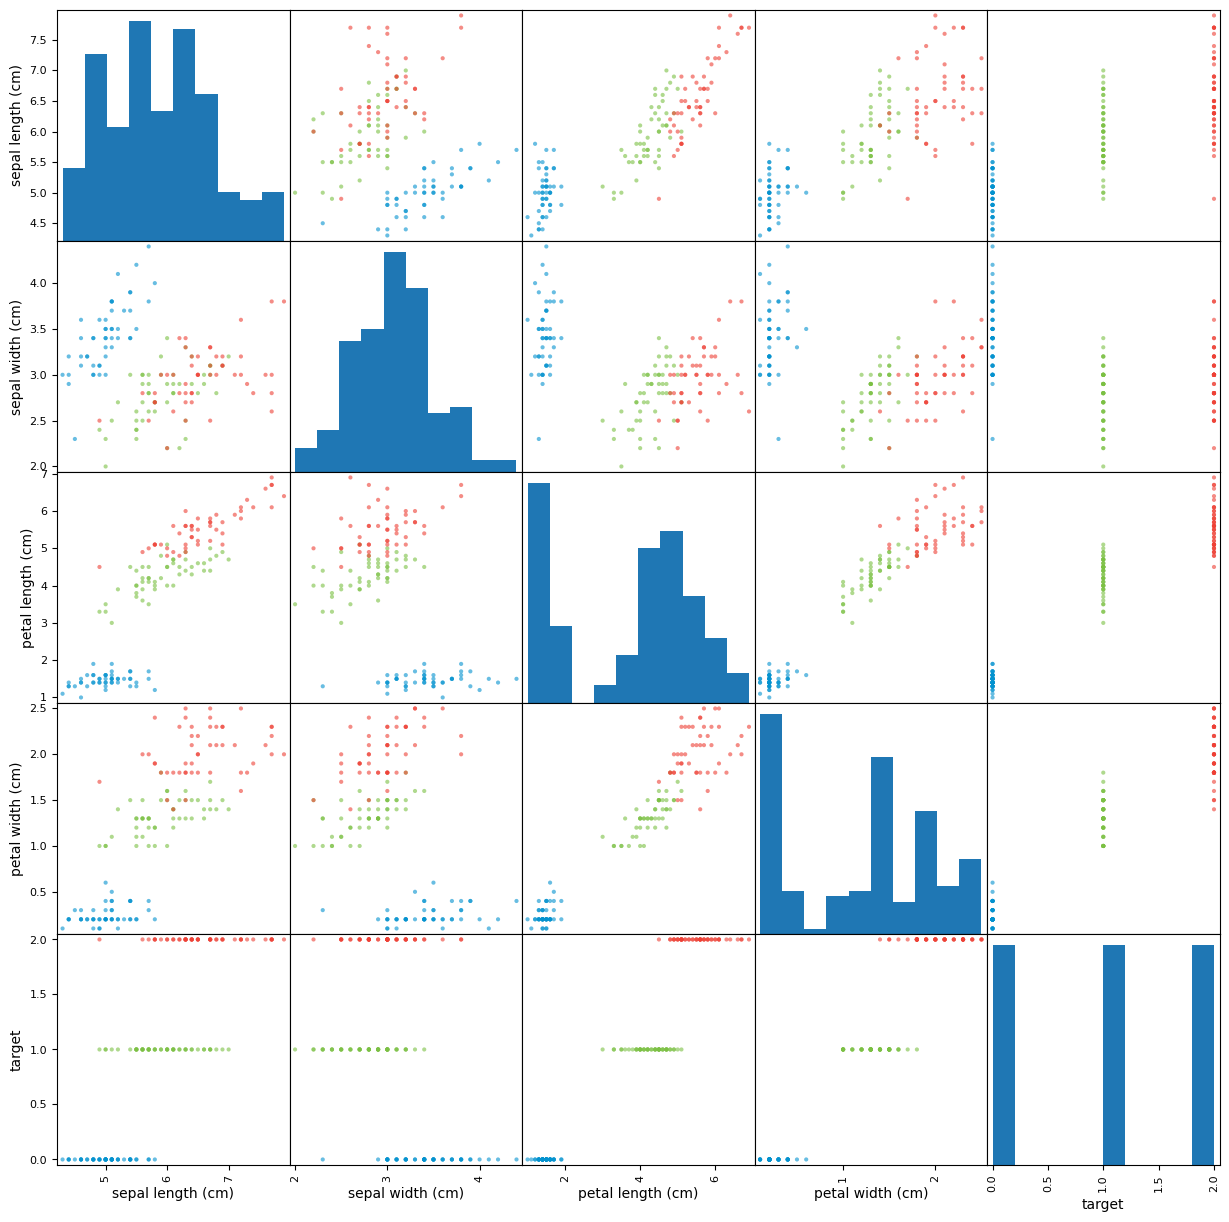

In [3]:
# code from
# http://stackoverflow.com/questions/21131707/multiple-data-in-scatter-matrix
from pandas.plotting import scatter_matrix
import pandas as pd

iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']
color_wheel = {1: "#0392cf", 
               2: "#7bc043", 
               3: "#ee4035"}
colors = iris_data["target"].map(lambda x: color_wheel.get(x + 1))
ax = scatter_matrix(iris_data, color=colors, alpha=0.6, figsize=(15, 15), diagonal='hist')

We'll only select the first two flower classes for binary classification (~100 rows),
and only use the first 2 features:

In [4]:
# Select first 2 flower classes (~100 rows)
# And first 2 features

sepal_len = iris['data'][:100,0]
sepal_wid = iris['data'][:100,1]
labels = iris['target'][:100]

Our binary classification model will look like this:

\begin{align*}
f(x) &= w_0 + w_1 x_1 + w_2 x_2 \\
\end{align*}

If $f(x) >= 0$ then we will classify the flower as a Setosa.

Let's look at these two features. Note that in our case, the data set is *linearly separable*,
meaning that it is possible to draw a line that separates the two classes.

In [5]:
X = np.stack([sepal_len, sepal_wid], axis=1)
Y = labels

Text(0, 0.5, 'sepal width')

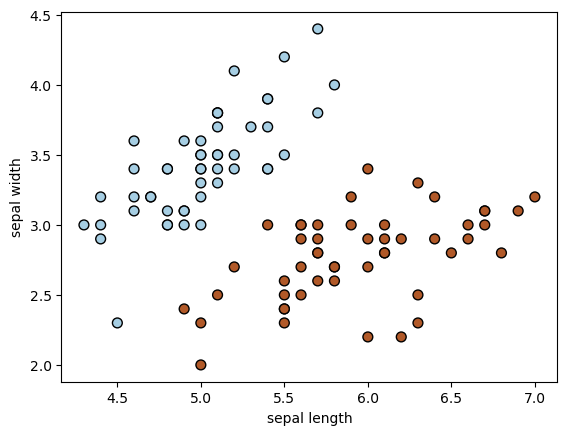

In [6]:
plt.scatter(....,
            ....,
            c=....,
            cmap=plt.cm.Paired,
            edgecolors='k',
            marker='o',
            s=50,
            label="Data Points")
plt.xlabel("sepal length")
plt.ylabel("sepal width")

## Decision Boundaries

The *decision boundary*$f(x) >= 0$ can be expressed as $w_0 + w_1 x_1 + w_2 x_2 = 0$.
The decision boundary is therefore a line through the origin in the data space!

The following function will help you plot a decision boundary  $w_0 + w_1 x_1 + w_2 x_2 = 0$.

In [18]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Function to plot the resulting line along with the data
def plot_decision_boundary(X, Y, weight_vector, title="Linear Classification"):
    
    plt.scatter(...., ...., ...., cmap=plt.cm.Paired, edgecolors='k', marker='o', s=50)
    
    # Plot the decision boundary (assuming 2D features)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    # Add a column of ones for the bias term
    Z = ....
    
    # Predict the labels for each point on the decision boundary
    Z_pred = ....
    
    # Reshape the predictions to match the shape of the meshgrid
    Z_pred = ....
    
    plt.contour(...., ...., ...., colors='g', linewidths=3, levels=[0.5], alpha=0.5)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.show()

Let's look at a few example hypothesis to see how the choices of $w_0$, $w_1$ and $w_2$ influence the 
decision boundary:

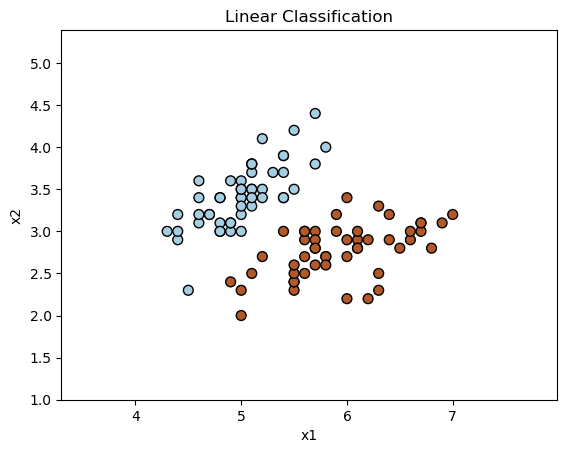

In [19]:
....(X, Y, [0, 0, 1])

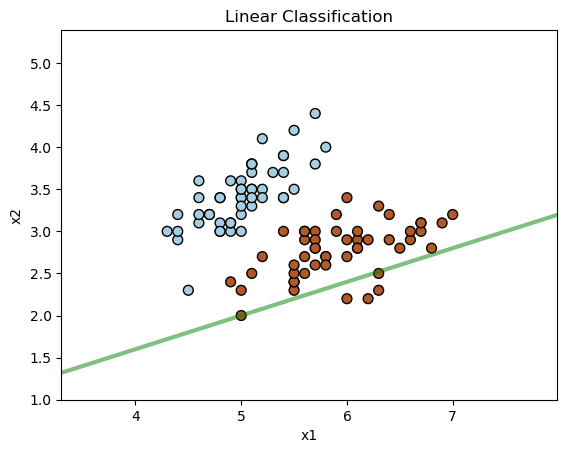

In [21]:
....(X, Y, [0.5,  0.4, -1])

## Implemenation from scratch

We will implement the linear classification using the formula studied in our course:
\begin{align*}
 W = (X^{\prime}X)^{-1}X^{\prime}Y \\
\end{align*}

In [22]:
import numpy as np

def linear_classification(...., ....):
    # Adding a column of ones to the feature matrix X for the bias term
    X = ....

    # Calculating the weight vector using the matrix formulation
    W_tilde = ....

    return ....

In [23]:
# Train the linear classifier on the first two features of the training data
weight_vector = linear_classification(...., ....)
print(weight_vector)

[-0.28531228  0.47927218 -0.59270275]


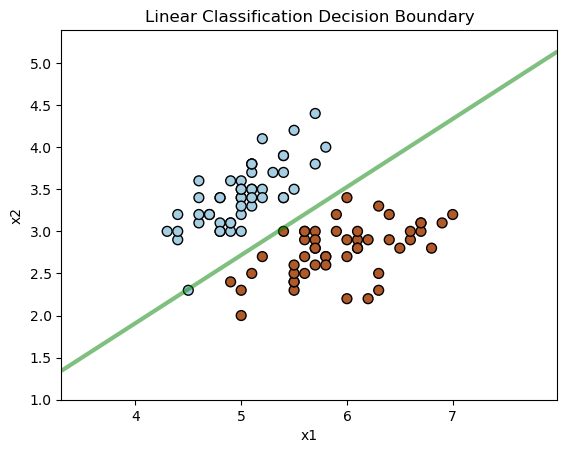

In [24]:
# Plot the decision boundary along with the data
plot_decision_boundary(...., ...., ...., title="Linear Classification Decision Boundary")

## Using `sklearn`

Now, we will write a sklearn code to solve a linear classification problem.

In [25]:
from sklearn import linear_model
LinearModel = ....

# Adding a column of ones to the feature matrix X for the bias term
X_new = ....

LinearModel.fit(...., ....)

LinearRegression(fit_intercept=False)

Here are the coefficients that we get from sklearn:

In [26]:
weight_vector_sklearn = ....
print(weight_vector_sklearn)

[-0.28531228  0.47927218 -0.59270275]


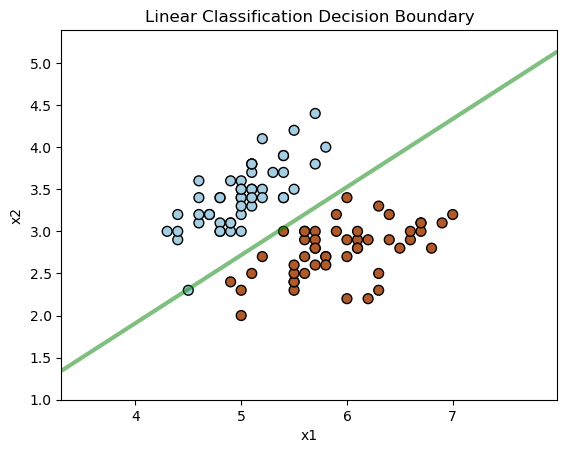

In [27]:
plot_decision_boundary(...., ...., ...., title="Linear Classification Decision Boundary")